# Análisis Exploratorio de Datos

## Importación de librerias

In [1]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

## Configuración visual

In [2]:
#Configuración visual
plt.style.use('seaborn-v0_8')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

viridis = cm.get_cmap('viridis', 256)
magma = cm.get_cmap('magma', 256)
plasma = cm.get_cmap('plasma', 256)

## Carga de archivos

In [3]:
# Cargamos el archivo limpio_marketingcampaings
df = pd.read_csv('limpio_marketingcampaigns.csv')

In [4]:
#Leemos el archivo y comprobamos que se haya subido correctamente
df.head(2)

,nombre campaña,fecha inicio,fecha fin,inversión,retorno inversión,tipo,audiencia target,canal,ratio conversión,facturación,duración días,categoría duración,beneficio neto,campaña exitosa,categoría inversión,categoría beneficio
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,"8.082,30","0,35",email,B2B,organic,"0,40","709.593,48",328.0,media,"701.511,18",Sí,bajo,alto
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,"17.712,98","0,74",email,B2C,promotion,"0,66","516.609,10",432.0,media,"498.896,12",Sí,bajo,medio


## Análisis

### 1.Canal de marketing más usado

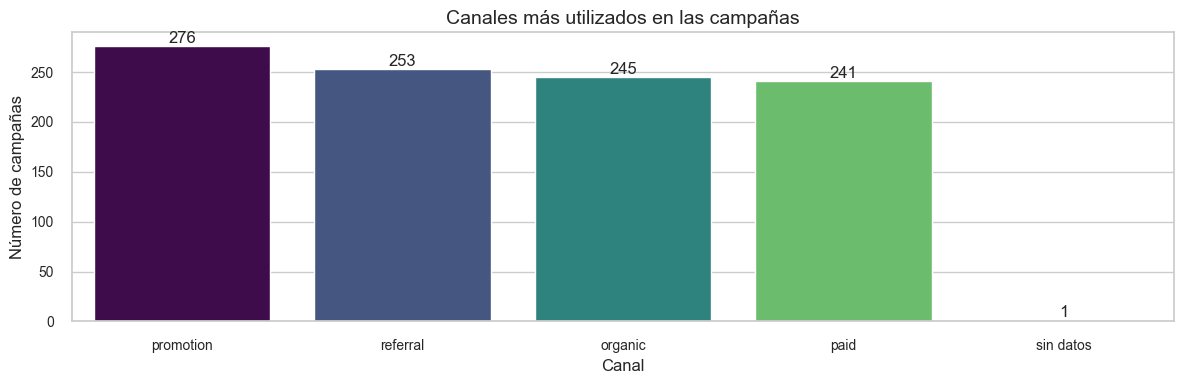

In [29]:
plt.figure(figsize=(12,4))

# Crear gráfico de barras usando los datos de canal_counts
sns.barplot(
    x=canal_counts.index, 
    y=canal_counts.values,
    palette=[viridis(i/4) for i in range(len(canal_counts))]
)

plt.title('Canales más utilizados en las campañas')
plt.xlabel('Canal')
plt.ylabel('Número de campañas')

# Añadir etiquetas de valor en cada barra
for i, v in enumerate(canal_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

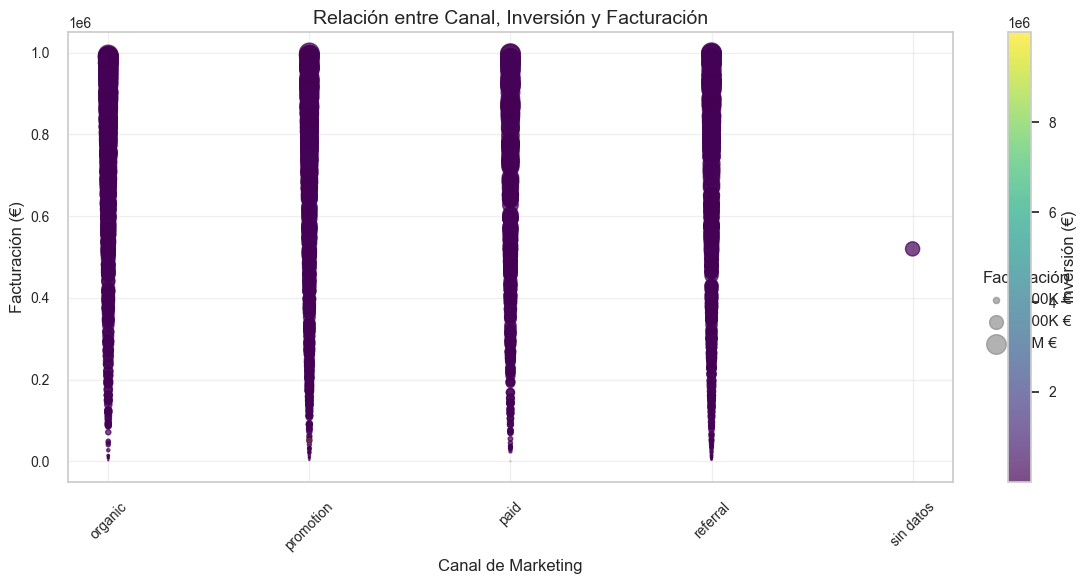

In [45]:
plt.figure(figsize=(12, 6))

# Create scatter plot
scatter = plt.scatter(df['canal'], 
                     df['facturación num'],
                     s=df['facturación num']/5000,  # Size based on revenue
                     c=df['inversión'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float),  # Color based on investment
                     cmap=viridis,
                     alpha=0.7)

# Customize the plot
plt.colorbar(scatter, label='Inversión (€)')
plt.title('Relación entre Canal, Inversión y Facturación', fontsize=14)
plt.xlabel('Canal de Marketing', fontsize=12)
plt.ylabel('Facturación (€)', fontsize=12)

# Add legend for bubble sizes
sizes = [100000, 500000, 1000000]
labels = ['100K €', '500K €', '1M €']
legend_elements = [plt.scatter([], [], s=size/5000, c='gray', alpha=0.6, label=label)
                  for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, 
          title='Facturación', 
          bbox_to_anchor=(1.15, 0.5))

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

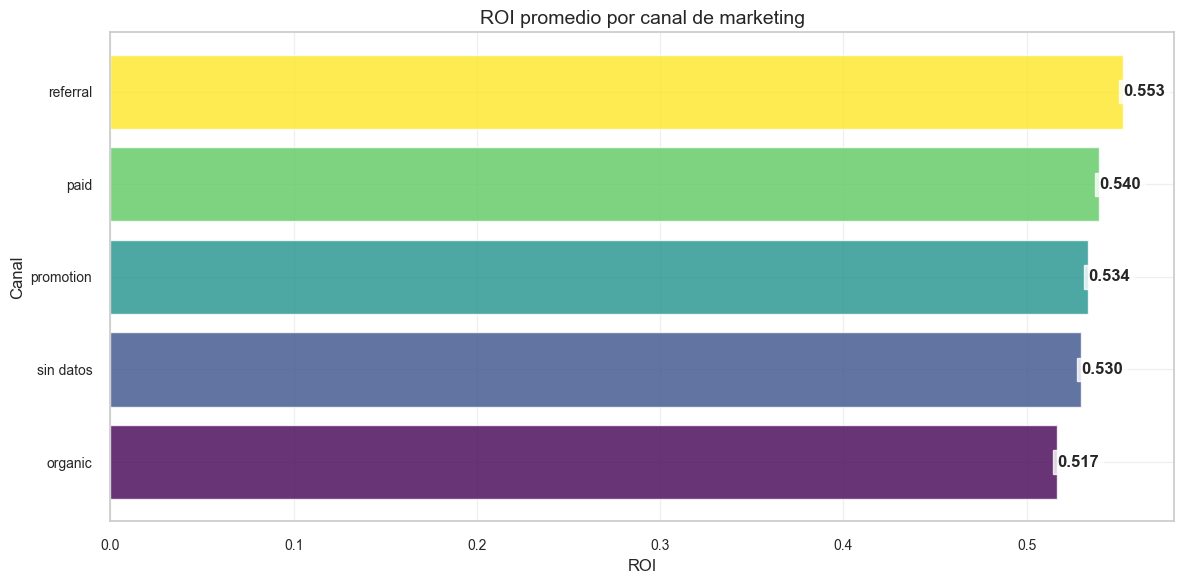

In [48]:
# Calculate average ROI by channel
roi_by_channel = df.groupby('canal')['roi_num'].mean().sort_values(ascending=True)

# Create the figure
plt.figure(figsize=(12, 6))

# Create barplot
bars = plt.barh(
    roi_by_channel.index,
    roi_by_channel.values,
    alpha=0.8,
    color=[viridis(i/4) for i in range(len(roi_by_channel))],
)

# Customize the plot
plt.title('ROI promedio por canal de marketing')
plt.xlabel('ROI')
plt.ylabel('Canal')

# Add value labels on the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, 
             bar.get_y() + bar.get_height()/2,
             f'{roi_by_channel.values[i]:.3f}',
             ha='left',
             va='center',
             fontweight='bold',
             transform=plt.gca().transData,
             bbox=dict(facecolor='white', alpha=0.8, pad=3))

# Add grid for better readability
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

CONCLUSIONES

1.Canales más utilizados en las campañas

Promotion es el canal más usado, seguido de referral, organic y paid.
La diferencia entre los canales principales es pequeña, lo que indica una estrategia multicanal equilibrada.

2.Relación entre Canal, Inversión y Facturación

Todos los canales presentan una distribución similar de facturación e inversión.
No hay un canal que destaque claramente por tener campañas con mucha mayor facturación o inversión.

3.ROI promedio por canal de marketing

Referral es el canal con mayor ROI promedio, seguido de paid y promotion.
Organic tiene el ROI promedio más bajo, aunque la diferencia entre canales no es muy grande.

CONCLUSIONES GENERALES

Las empresas utilizan de forma equilibrada los diferentes canales de marketing, sin depender excesivamente de uno solo.
El canal referral es el más eficiente en términos de retorno de inversión (ROI), por lo que podría ser interesante potenciarlo.
No hay grandes diferencias en inversión y facturación entre canales, pero sí ligeras diferencias en eficiencia (ROI).




### 2.Tipo de campaña que genera más ingresos

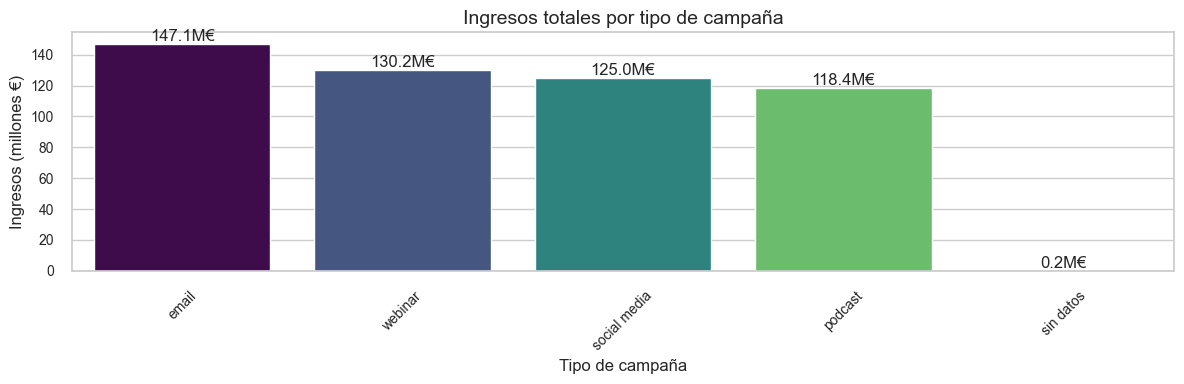

In [31]:
# Crear gráfico de barras de ingresos por tipo de campaña
plt.figure(figsize=(12,4))

# Filtrar los tipos que no queremos mostrar
tipos_excluir = ['B2B', 'event']
beneficios_filtrado = beneficios_por_tipo[~beneficios_por_tipo.index.isin(tipos_excluir)]

# Ordenar los valores de mayor a menor
sns.barplot(
    x=beneficios_filtrado.index,
    y=beneficios_filtrado.values/1e6,  # Convertir a millones para mejor visualización
    palette=[viridis(i/4) for i in range(len(beneficios_filtrado))]
)

# Personalizar el gráfico
plt.title('Ingresos totales por tipo de campaña')
plt.xlabel('Tipo de campaña')
plt.ylabel('Ingresos (millones €)')
plt.xticks(rotation=45)

# Añadir etiquetas en las barras
for i, v in enumerate(beneficios_filtrado.values/1e6):
    plt.text(i, v, f'{v:.1f}M€', ha='center', va='bottom')

plt.tight_layout()
plt.show()

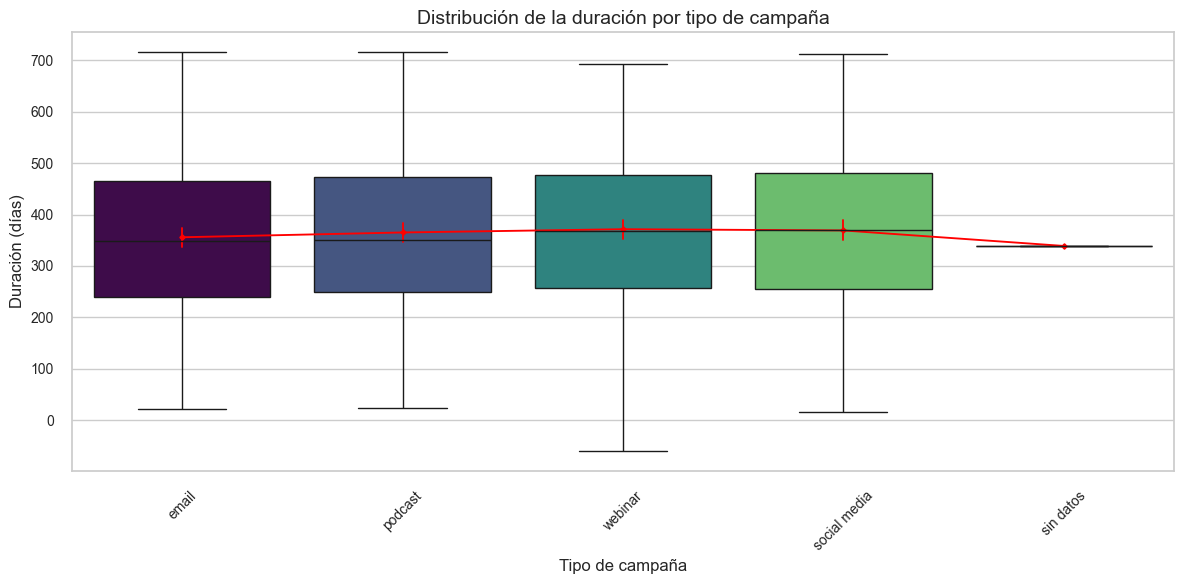

In [33]:
# Crear un boxplot para mostrar la distribución de la duración por tipo de campaña
plt.figure(figsize=(12, 6))

# Filtrar los tipos que no queremos mostrar
tipos_excluir = ['B2B', 'event']
df_filtrado = df[~df['tipo'].isin(tipos_excluir)]

# Crear el boxplot
sns.boxplot(
    data=df_filtrado, 
    x='tipo', 
    y='duracion_num',
    palette=viridis(np.linspace(0, 1, len(df_filtrado['tipo'].unique()))),
    whis=1.5
)

plt.title('Distribución de la duración por tipo de campaña')
plt.xlabel('Tipo de campaña')
plt.ylabel('Duración (días)')
plt.xticks(rotation=45)

# Añadir la media como puntos
sns.pointplot(
    data=df_filtrado,
    x='tipo',
    y='duracion_num',
    color='red',
    markers='D',
    scale=0.5
)

plt.tight_layout()
plt.show()

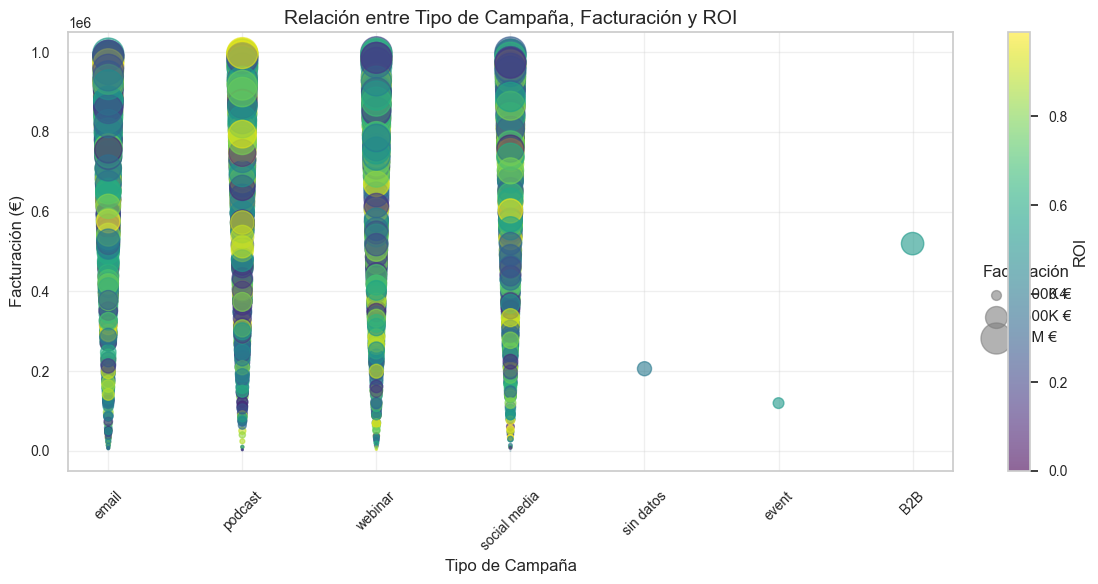

In [50]:
plt.figure(figsize=(12, 6))

# Create scatter plot
scatter = plt.scatter(df['tipo'], 
                     df['facturación num'],
                     s=df['facturación num']/2000,  # Size based on revenue
                     c=df['roi_num'],  # Color based on ROI
                     cmap=viridis,
                     alpha=0.6)

# Customize the plot
plt.colorbar(scatter, label='ROI')
plt.title('Relación entre Tipo de Campaña, Facturación y ROI')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Facturación (€)')

# Add legend for bubble sizes
sizes = [100000, 500000, 1000000]
labels = ['100K €', '500K €', '1M €']
legend_elements = [plt.scatter([], [], s=size/2000, c='gray', alpha=0.6, label=label)
                  for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, 
          title='Facturación', 
          bbox_to_anchor=(1.15, 0.5))

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

### 3.Análisis del ROI

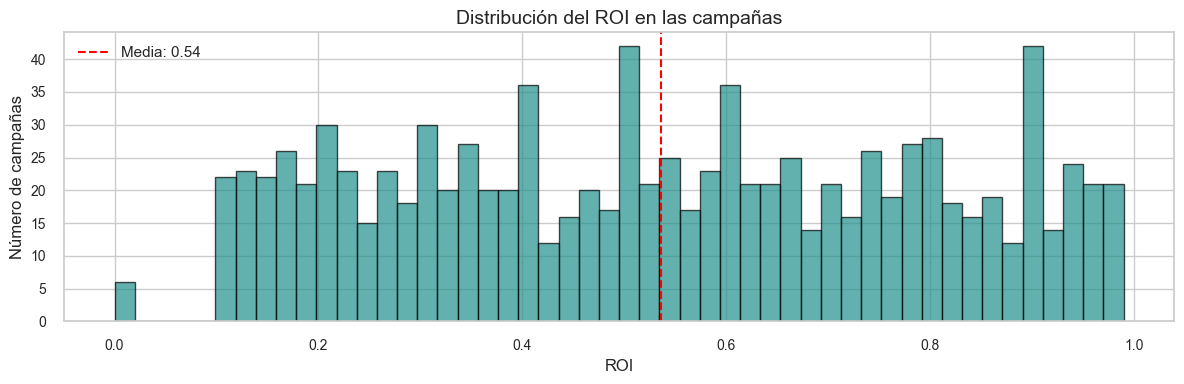

In [34]:
# Crear un histograma con la distribución del ROI
plt.figure(figsize=(12,4))

plt.hist(df['roi_num'], bins=50, color=viridis(0.5), alpha=0.7, edgecolor='black')
plt.axvline(df['roi_num'].mean(), color='red', linestyle='--', label=f'Media: {df["roi_num"].mean():.2f}')

plt.title('Distribución del ROI en las campañas')
plt.xlabel('ROI')
plt.ylabel('Número de campañas')
plt.legend()

plt.tight_layout()
plt.show()

### 4.Tasa de conversión según tipo de cliente (B2B/B2C)

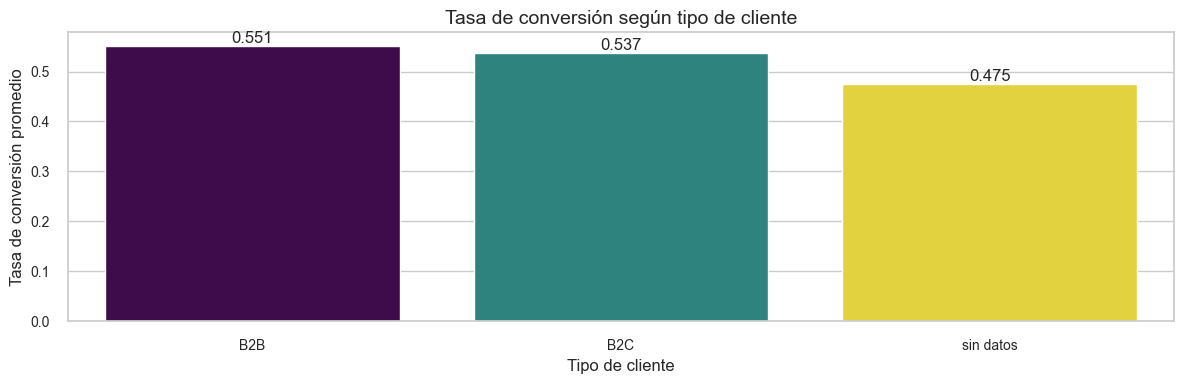

In [35]:
# Crear gráfico de barras para tasa de conversión por tipo de cliente
plt.figure(figsize=(12,4))

# Usar los valores de conversion_filtrada que ya está calculado
sns.barplot(
    x=conversion_filtrada.index,
    y=conversion_filtrada.values,
    palette=[viridis(i/2) for i in range(len(conversion_filtrada))]
)

plt.title('Tasa de conversión según tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Tasa de conversión promedio')

# Añadir etiquetas en las barras
for i, v in enumerate(conversion_filtrada.values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 5.Campaña con mayor beneficio neto

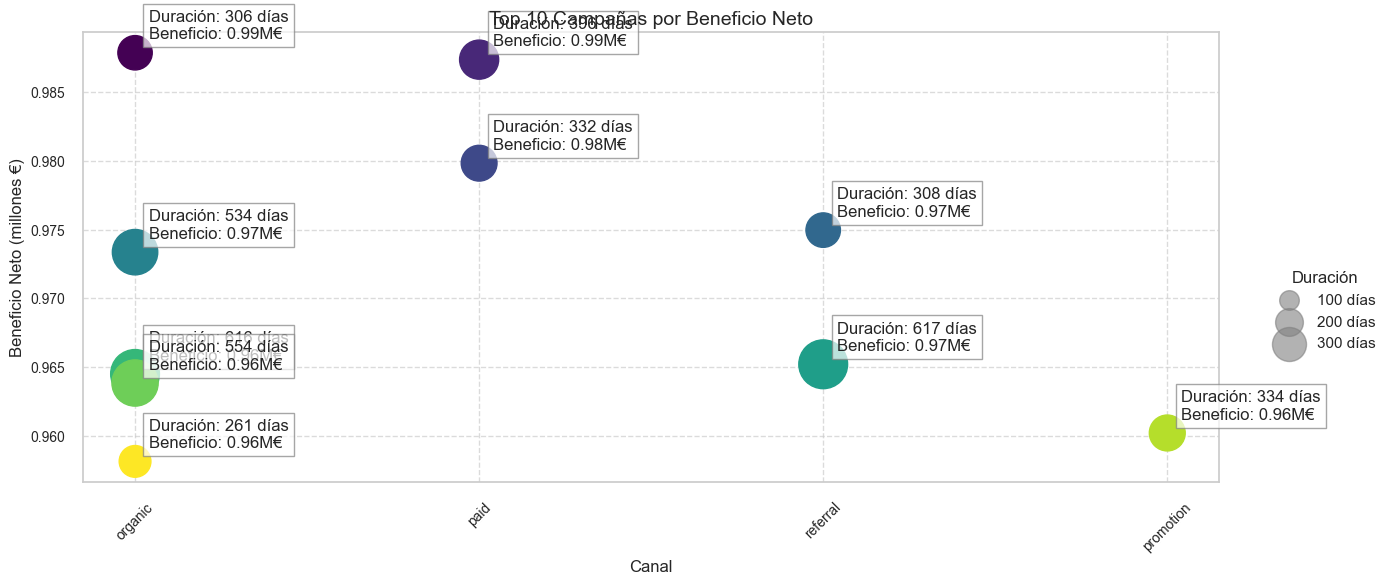

In [43]:
# Obtener las 10 campañas con mayor beneficio neto
top10_beneficio = df.nlargest(10, 'beneficio neto num')

# Crear gráfico
plt.figure(figsize=(14,6))

# Crear scatter plot
scatter = plt.scatter(x=top10_beneficio['canal'], 
                     y=top10_beneficio['beneficio neto num']/1e6,
                     s=top10_beneficio['duracion_num']*2,
                     c=range(len(top10_beneficio)),
                     cmap=viridis)

# Personalizar el gráfico
plt.title('Top 10 Campañas por Beneficio Neto')
plt.xlabel('Canal')
plt.ylabel('Beneficio Neto (millones €)')

# Añadir etiquetas con información
for idx, row in top10_beneficio.iterrows():
    plt.annotate(f"Duración: {row['duracion_num']:.0f} días\nBeneficio: {row['beneficio neto num']/1e6:.2f}M€",
                xy=(row['canal'], row['beneficio neto num']/1e6),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(facecolor='white', edgecolor='gray', alpha=0.7))

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir leyenda para el tamaño de los puntos
sizes = [100, 200, 300]
labels = ['100 días', '200 días', '300 días']
legend_elements = [plt.scatter([], [], s=size*2, c='gray', alpha=0.6, label=label)
                  for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Duración', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

### 6.Relación entre inversión e ingresos

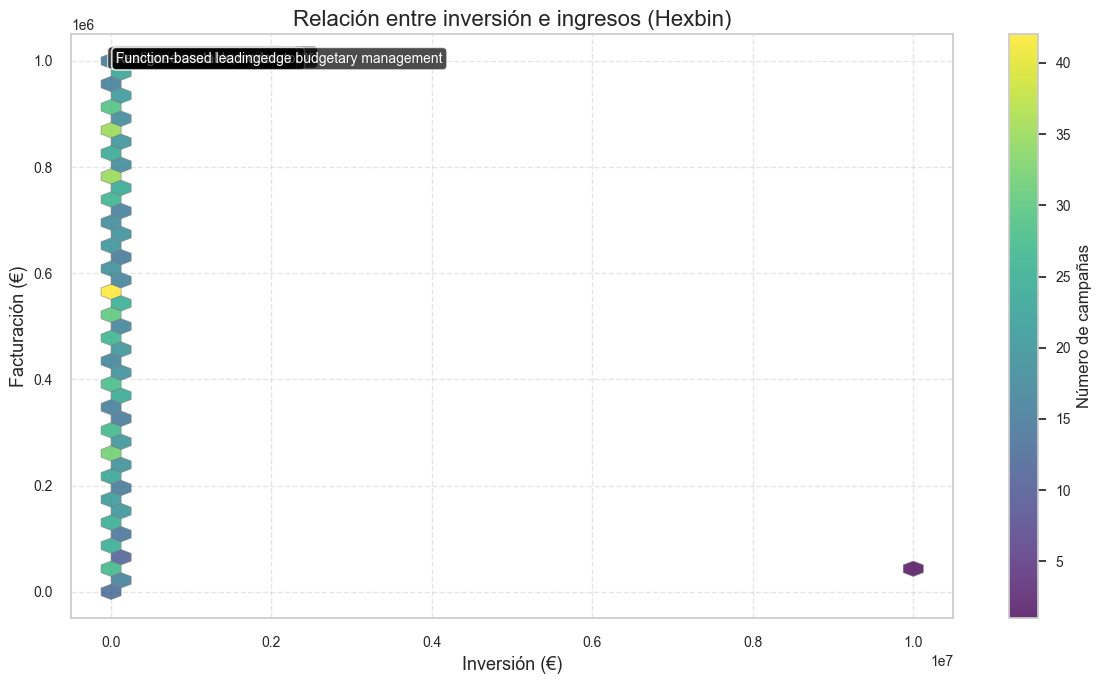

In [21]:
# Gráfico hexbin: inversión vs facturación
plt.figure(figsize=(12, 7))
x = df['inversión'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)
y = df['facturación num']

hb = plt.hexbin(
    x, y, gridsize=40, cmap=viridis, mincnt=1, linewidths=0.5, edgecolors='grey', alpha=0.8
)
cb = plt.colorbar(hb)
cb.set_label('Número de campañas')

plt.title('Relación entre inversión e ingresos (Hexbin)', fontsize=16)
plt.xlabel('Inversión (€)', fontsize=13)
plt.ylabel('Facturación (€)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Etiquetas para los puntos con mayor facturación
for _, row in top_points.iterrows():
    plt.text(
        float(row['inversión'].replace('.', '').replace(',', '.')),
        row['facturación num'],
        row['nombre campaña'],
        fontsize=10,
        color='white',
        bbox=dict(facecolor='black', alpha=0.7, boxstyle='round,pad=0.3')
    )

plt.show()


### 7.Campaña con ROI mayor a 0.5 e ingresos por encima de 500.000

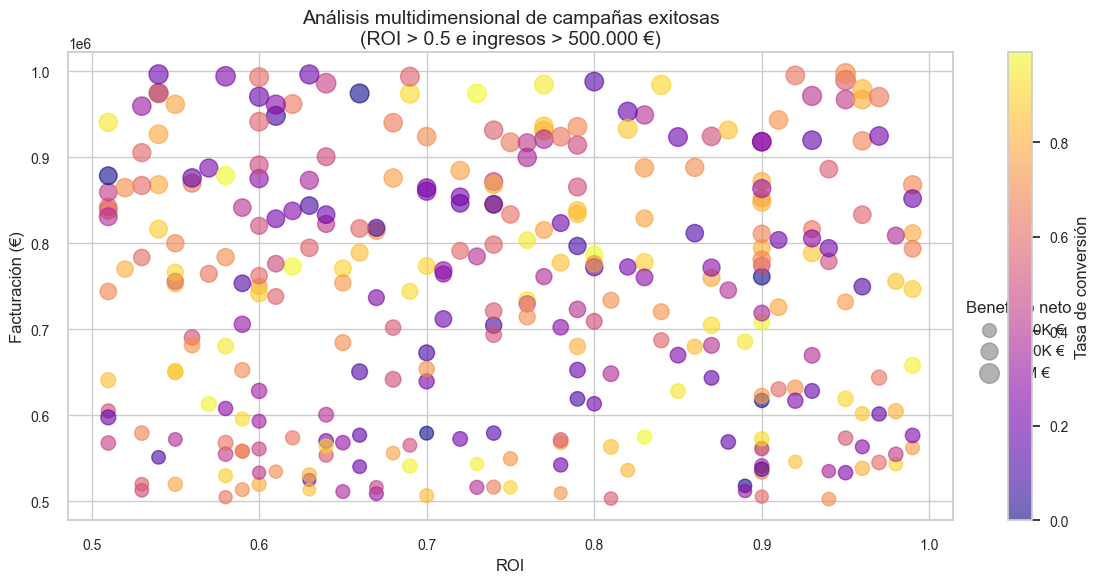

In [25]:
# Filtrar las campañas según los criterios
filtro = (df['roi_num'] > 0.5) & (df['facturación num'] > 500000)
campañas_filtradas = df[filtro]

# Crear un gráfico de burbujas con diferentes métricas
plt.figure(figsize=(12, 6))

# Crear el scatter plot donde el tamaño representa el beneficio neto
scatter = plt.scatter(
    campañas_filtradas['roi_num'],
    campañas_filtradas['facturación num'],
    s=campañas_filtradas['beneficio neto num']/5000,  # Ajustar tamaño de las burbujas
    c=campañas_filtradas['ratio_conv_num'],  # Color basado en la tasa de conversión
    cmap='plasma',
    alpha=0.6
)

plt.colorbar(scatter, label='Tasa de conversión')
plt.title('Análisis multidimensional de campañas exitosas\n(ROI > 0.5 e ingresos > 500.000 €)')
plt.xlabel('ROI')
plt.ylabel('Facturación (€)')

# Añadir leyenda para el tamaño de las burbujas
sizes = [500000, 750000, 1000000]
labels = ['500K €', '750K €', '1M €']
legend_elements = [plt.scatter([], [], s=size/5000, c='gray', alpha=0.6, label=label)
                  for size, label in zip(sizes, labels)]
plt.legend(handles=legend_elements, title='Beneficio neto', bbox_to_anchor=(1.15, 0.5))

plt.tight_layout()
plt.show()

### 8.Patrones estacionales o temporales 

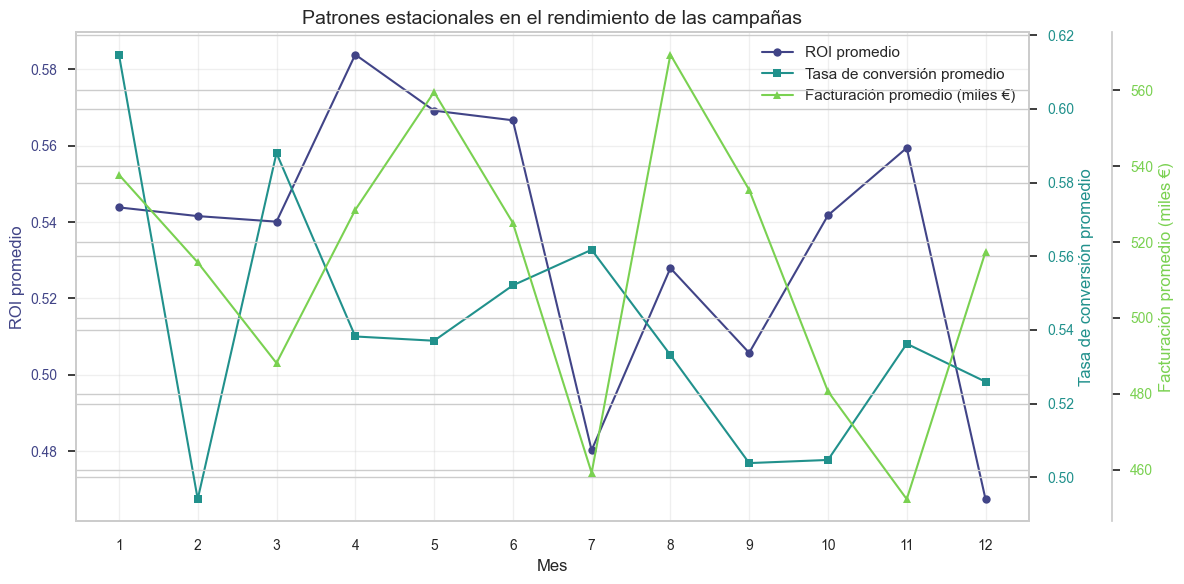

In [26]:
# Convertimos las fechas a datetime
df['fecha inicio'] = pd.to_datetime(df['fecha inicio'])

# Extraemos mes y año
df['mes'] = df['fecha inicio'].dt.month
df['año'] = df['fecha inicio'].dt.year

# Calculamos métricas promedio por mes
monthly_metrics = df.groupby('mes').agg({
    'roi_num': 'mean',
    'ratio_conv_num': 'mean',
    'facturación num': 'mean'
}).reset_index()

# Creamos el gráfico con múltiples métricas
fig, ax1 = plt.subplots(figsize=(12, 6))

# ROI promedio (eje izquierdo)
color1 = viridis(0.2)
ax1.plot(monthly_metrics['mes'], monthly_metrics['roi_num'], 
         color=color1, marker='o', label='ROI promedio')
ax1.set_xlabel('Mes')
ax1.set_ylabel('ROI promedio', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# Tasa de conversión (eje derecho)
ax2 = ax1.twinx()
color2 = viridis(0.5)
ax2.plot(monthly_metrics['mes'], monthly_metrics['ratio_conv_num'], 
         color=color2, marker='s', label='Tasa de conversión promedio')
ax2.set_ylabel('Tasa de conversión promedio', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Facturación promedio (eje derecho secundario)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
color3 = viridis(0.8)
ax3.plot(monthly_metrics['mes'], monthly_metrics['facturación num']/1000, 
         color=color3, marker='^', label='Facturación promedio (miles €)')
ax3.set_ylabel('Facturación promedio (miles €)', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)

# Configuración adicional
plt.title('Patrones estacionales en el rendimiento de las campañas')
ax1.set_xticks(range(1,13))
ax1.grid(True, alpha=0.3)

# Leyenda combinada
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.tight_layout()
plt.show()

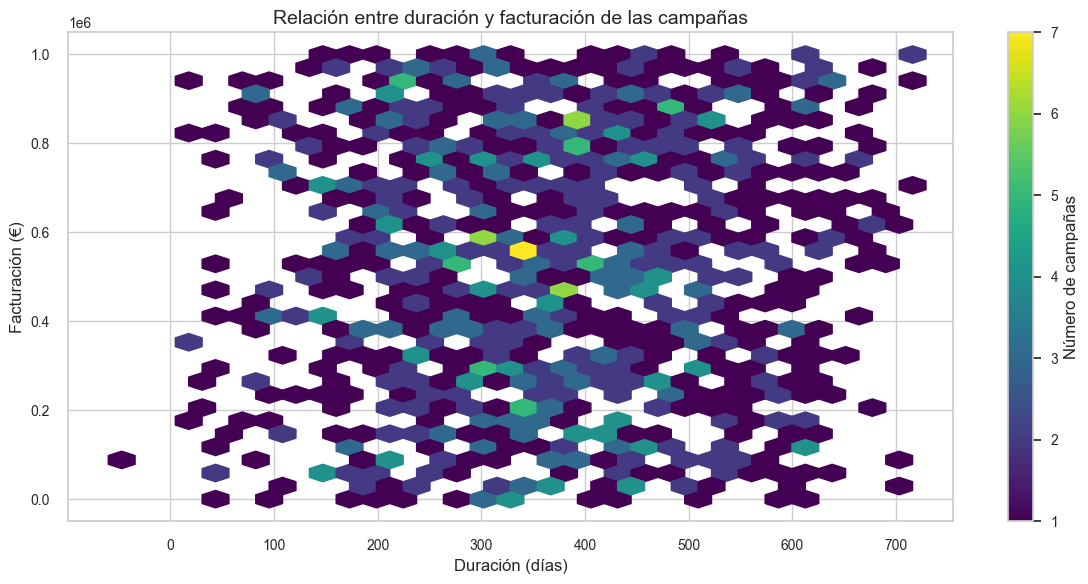

In [28]:
# Convertir 'duración días' a numérico, eliminando valores no numéricos
df['duracion_num'] = pd.to_numeric(df['duración días'], errors='coerce')

plt.figure(figsize=(12, 6))

# Crear scatter plot con hexbin
plt.hexbin(
    df['duracion_num'],
    df['facturación num'], 
    gridsize=30,
    cmap=viridis,
    mincnt=1
)

plt.colorbar(label='Número de campañas')

plt.title('Relación entre duración y facturación de las campañas')
plt.xlabel('Duración (días)')
plt.ylabel('Facturación (€)')

# Ajustar layout
plt.tight_layout()
plt.show()